# Исследованные продаж компьютерных игр 

В нашем расположение данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Описание данных
<ul>
    <li>Name — название игры</li>
    <li>Platform — платформа</li>
    <li>Year_of_Release — год выпуска</li>
    <li>Genre — жанр игры</li>
    <li>NA_sales — продажи в Северной Америке (миллионы проданных копий)</li>
    <li>EU_sales — продажи в Европе (миллионы проданных копий)</li>
    <li>JP_sales — продажи в Японии (миллионы проданных копий)</li>
    <li>Other_sales — продажи в других странах (миллионы проданных копий)</li>
    <li>Critic_Score — оценка критиков (максимум 100)</li>
    <li>User_Score — оценка пользователей (максимум 10)</li>
    <li>Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.</li>
</ul>
Данные за 2016 год могут быть неполными.

## Открыли файл с данными и изучили общую информацию

1.1 Импортировали библиотеку pandas. Считали данные из csv-файла в датафрейм и сохранили в переменную data. Вывели первые 10 строчек датафрейма на экран.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data=pd.read_csv('games.csv.', sep=',')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


1.2. Вывели основную информацию о датафрейме.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Предобработка данных

2.1 Перевели названия столбцов в нижний регистр

In [3]:
data=data.rename(columns=lambda x: x.lower())

2.2. Преобразовали столбцы в нужные типы: "year_of_release" к "int"(так как год издания целочисленный), "user_score" к "float64"(так как оценка пользователей -численное значение). В столбце "user_score"  'tbd' заменим на 'NaN'.

In [4]:
data = data.replace('tbd', 'NaN')
data['year_of_release']=data['year_of_release'].astype(float)
data['user_score']=data['user_score'].astype(float)


2.3. Проверили изменение типов. 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


2.4. Вывели количество пропущенных значений по каждому столбцу.

In [6]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Заполнили пропуски в столбцу 'name' на 'unknown'.

In [7]:
data['name']=data['name'].fillna('unknown')

В столбцах "year_of_release", "critic_score", "user_score", "rating" невозможно однозначно заполнить пропуски. 
Пропуски в столбцах "critic_score", "user_score", "rating"(оценки критиков и пользователей, рейтинг от организации ESRB) появились в 1980, поэтому и образовались пропуски.

In [8]:
data[data['name']=='unknown']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,unknown,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,unknown,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


<ul>
    <li>Пропуски в столбцах 'name','genre' есть у платформмы 'GEN'. Они могли образоваться из-за человеской ошибки( т.е. при заполнение таблицы их просто не написали), либо платформа не присвоила имя и не указала жанр.</li>
    <li>'rating'-рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Она появилась в 1994, поэтому до этого года в данных ропуски, также возможно рейтинг был неприсвоен. Также помимо данного рейтинга ESRB( принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.), есть другие рейтиннги, например, PEGI</li>
    <li>В столбцах "critic_score", "user_score"-оценки критиков и пользователей. Скорее всего оценки появились не сразу с выпуском игр в 1980. поэтому есть пропуски в ранних годах. Также остальные пропуски могли вознинуть из-за челоческого фактора, либо оценки могли вообще не зафиксировать.</li>
    <li>Пропуски в столбце 'year_of_release'(год выпуска) могли появится из человеческой ошибки. Например, в название игры записан год-"wwe Smackdown vs. Raw 2006"</li>
</ul

2.6 Посчитали  суммарные продажи во всех регионах и добавили в "total_sales"

In [9]:
data['total_sales']=data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


2.7 Проверили наличие дубликатов.

In [10]:
data.duplicated().sum()

0

In [11]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [12]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Нет дубликатов в столбцах "platform", "genre".

In [13]:
data['name'].duplicated().sum()

5155

In [14]:
(data.pivot_table(index='name', values='platform', aggfunc='count')
.sort_values(by='platform', ascending=False)
.head(10))

,platform
name,
Need for Speed: Most Wanted,12
Madden NFL 07,9
FIFA 14,9
LEGO Marvel Super Heroes,9
Ratatouille,9
Madden NFL 08,8
FIFA Soccer 13,8
Cars,8
Lego Batman 3: Beyond Gotham,8


Есть дубликаты в навзание игр. Но они выпущено на разных платформах.

### Исследовательский анализ данных.

3.1. Сгупироввали данные по годам и вывели количество игр за каждый год. Построили график.

<AxesSubplot:title={'center':'Распределение выпуска игр по годам'}, xlabel='Год выпуска', ylabel=' Количество игр'>

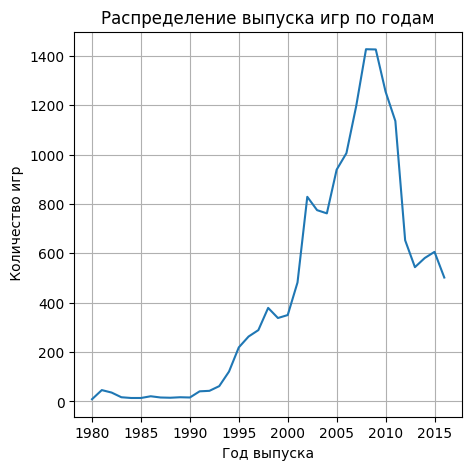

In [50]:
(data.groupby('year_of_release')['name'].count()
     .plot(x='year_of_release', grid=True, figsize=(5,5), xlabel='Год выпуска', ylabel=" Количество игр", title="Распределение выпуска игр по годам")
)

По графику видно, что пик выпуска  игр приходился на период с 2002-2011. 

3.2. Вывели таблицу сумарных продаж по платформам.

<AxesSubplot:title={'center':'Продажи по платформам'}, xlabel='Платформы', ylabel='Мировые продажи'>

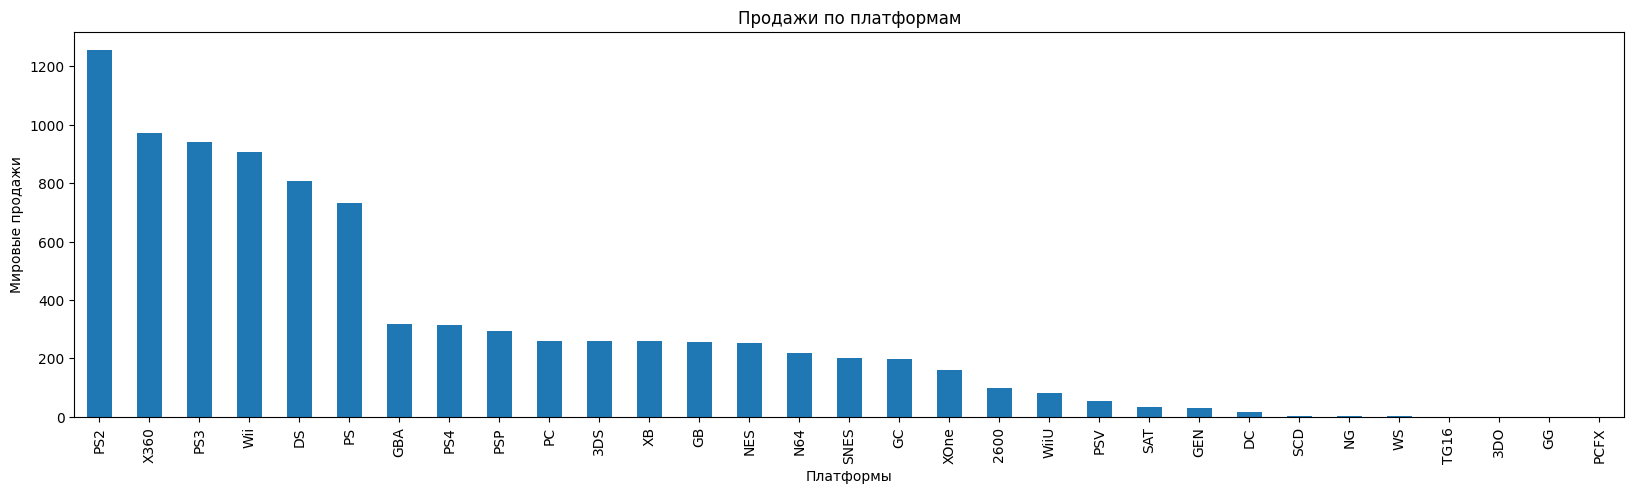

In [16]:
(data.groupby('platform')['total_sales'].sum()
.sort_values(ascending=False)
.plot(x='platform', y='total_sales', kind='bar', figsize=(20,5), xlabel='Платформы', ylabel='Мировые продажи', title='Продажи по платформам'))

3.3. Построили распредение продаж по годам у платформ "X360", "Wii", "PS3", "DS", "PS2", "PS".

<AxesSubplot:title={'center':'X360'}, xlabel='Год выпуска', ylabel='Мировые продажи'>

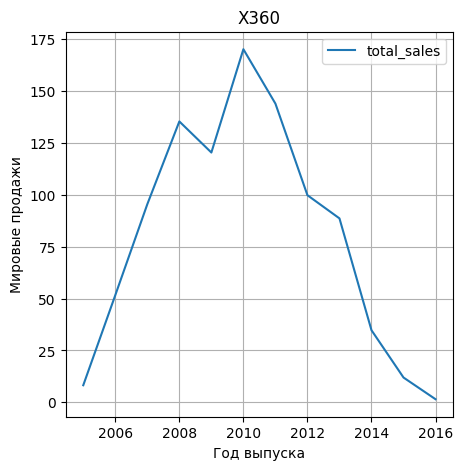

In [17]:
(data.query('platform=="X360"')
 .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
 .plot(grid=True, figsize=(5,5), title='X360', xlabel='Год выпуска',ylabel='Мировые продажи')
)

Больше всего игр продано на платформе X360 в 2010 году. Далее наблюдается спад продаж. В 2016 он составил ноль.

<AxesSubplot:title={'center':'Wii'}, xlabel='Год выпуска', ylabel='Мировые продажи'>

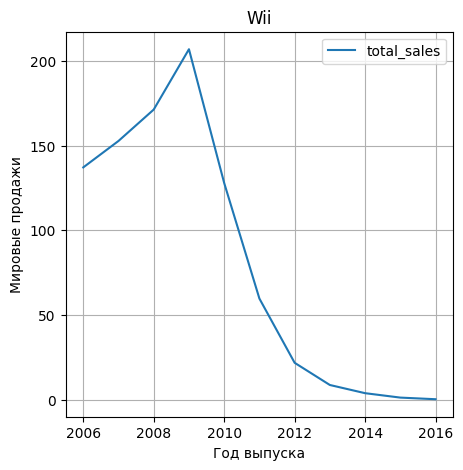

In [18]:
(data.query('platform=="Wii"')
 .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
 .plot(grid=True, figsize=(5,5), title='Wii', xlabel='Год выпуска',ylabel='Мировые продажи')
)

Больше всего продано на платформе Wii в 2009 году. Далее идет большой спад. В 2016 году ничего не продали.

<AxesSubplot:title={'center':'PS3'}, xlabel='Год выпуска', ylabel='Мировые продажи'>

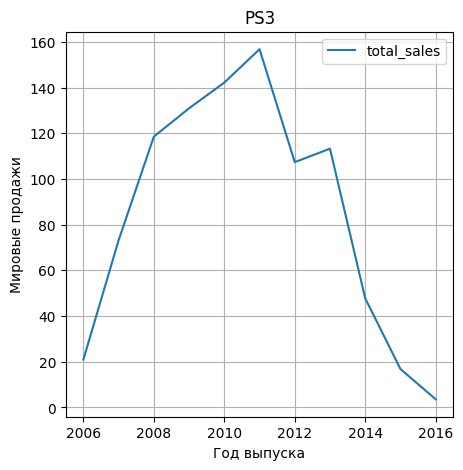

In [19]:
(data.query('platform=="PS3"')
 .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
 .plot(grid=True, figsize=(5,5), title='PS3', xlabel='Год выпуска',ylabel='Мировые продажи')
)

Пик продаж приходиться на 2011 год. далее идет спад.

<AxesSubplot:title={'center':'DS'}, xlabel='Год выпуска', ylabel='Мировые продажи'>

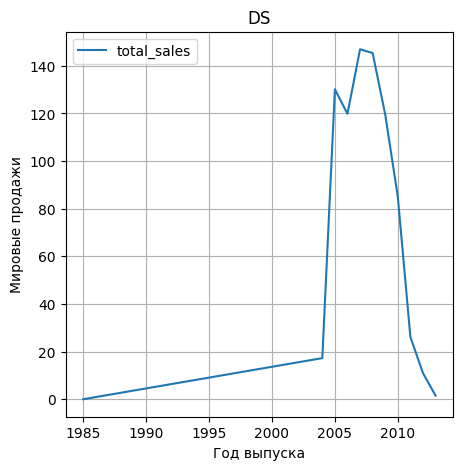

In [20]:
(data.query('platform=="DS"')
 .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
 .plot(grid=True, figsize=(5,5), title='DS', xlabel='Год выпуска',ylabel='Мировые продажи')
)

Пик продаж наблюдается в промежутке с 2006-2008. Далее идет заметный спад.

<AxesSubplot:title={'center':'PS2'}, xlabel='Год выпуска', ylabel='Мировые продажи'>

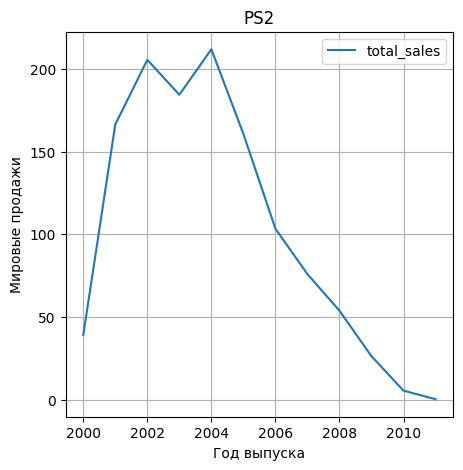

In [21]:
(data.query('platform=="PS2"')
 .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
 .plot(grid=True, figsize=(5,5), title='PS2', xlabel='Год выпуска',ylabel='Мировые продажи')
)

Пик продаж в 2004. Далее идет спад. После 2010 на данной платформе не появилялись новые игры.

<AxesSubplot:title={'center':'PS'}, xlabel='Год выпуска', ylabel='Мировые продажи'>

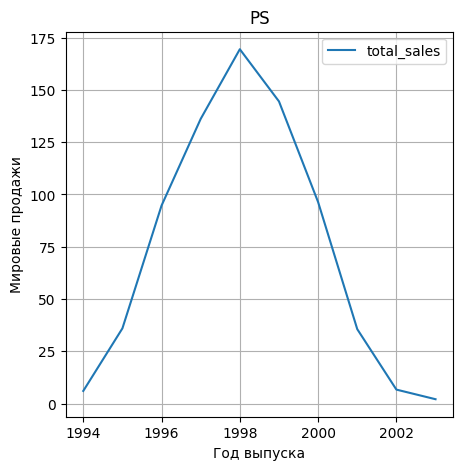

In [22]:
(data.query('platform=="PS"')
 .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
 .plot(grid=True, figsize=(5,5), title='PS', xlabel='Год выпуска',ylabel='Мировые продажи')
)

Пик проадаж приходится на 1998 год.

3.4. Вывели таблицу с появлением каждой платформмы.

In [23]:
(data.sort_values(by='year_of_release')
 .groupby('platform').head(1)
 .reset_index(drop=True)
 .loc[:,['platform','year_of_release']]
)

,platform,year_of_release
0,2600,1980.0
1,NES,1983.0
2,DS,1985.0
3,PC,1985.0
4,GB,1988.0
5,SNES,1990.0
6,GEN,1990.0
7,GG,1992.0
8,NG,1993.0
9,SCD,1993.0


3.5. Вывели таблицу с годом последенего выпуска игры на каждой платформы.

In [24]:
(data.sort_values(by='year_of_release',ascending=False)
 .groupby('platform').head(1)
 .reset_index(drop=True)
 .loc[:,['platform','year_of_release']]
)

,platform,year_of_release
0,PSV,2016.0
1,PC,2016.0
2,XOne,2016.0
3,PS4,2016.0
4,PS3,2016.0
5,3DS,2016.0
6,X360,2016.0
7,WiiU,2016.0
8,Wii,2016.0
9,PSP,2015.0


Новые платформы появляются в течение 1-3 лет. Такие платформы, как "QQ", "SCD", "DO", "TG16", "PCFX" просуществовали 1-2 года. В среднем платформы исчезают через 6-9 лет, но, например, "DS" ушла с рынка через 28 лет.

Для дальнейшего анализа будем рассматривать период 2014-2016, так как индустрия игр быстро разваивается, поэтому данные за ранние периоды могут быть уже устаревшими.

3.6. Методом query выбрали актульный период 2014-2016. 

In [25]:
df=data.query('2013<year_of_release<=2016')

3.7. Построили гисторгамму распределения мировых продаж по платформам за актульный период.

<AxesSubplot:title={'center':'Продажи по платформам'}, xlabel='Платформы', ylabel='Мировые продажи'>

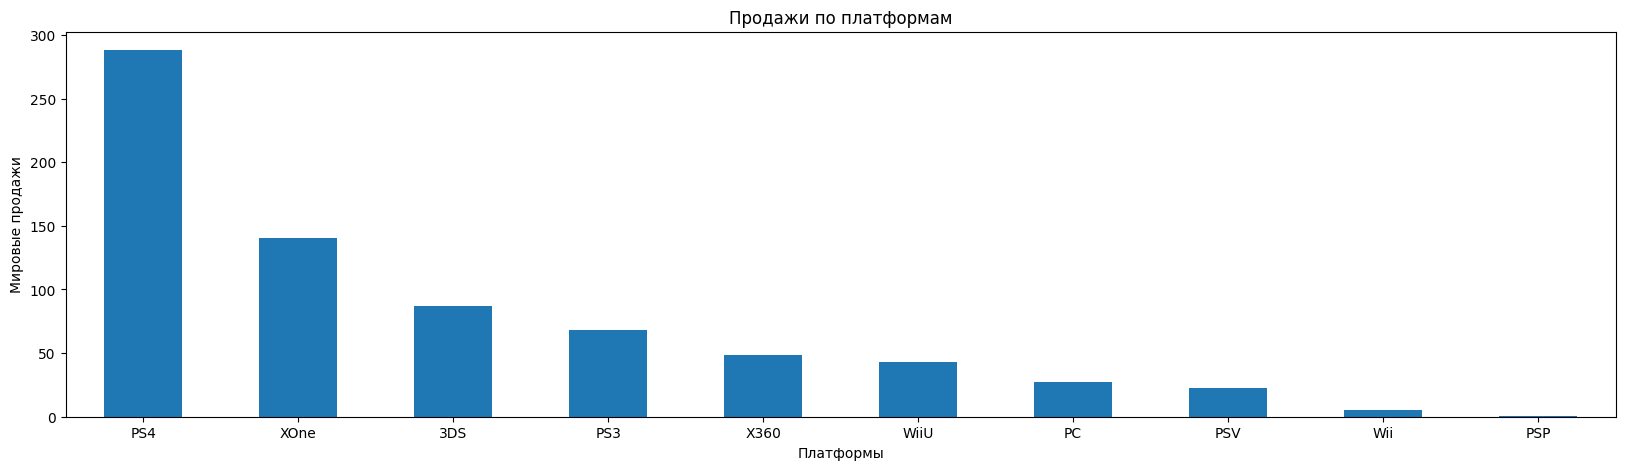

In [26]:
(df.groupby('platform')['total_sales'].sum()
.sort_values(ascending=False)
.plot(x='platform', y='total_sales', kind='bar', figsize=(20,5), xlabel='Платформы', ylabel='Мировые продажи', title='Продажи по платформам', rot=360)
)

Наиболее прибыльные платформы: "PS4","XOne", "3DS", "PS3", "X360".

3.8. Посторили график «ящик с усами» по глобальным продажам игр в разбивке по прибыльным платформам.

Text(0.5, 0.98, '')

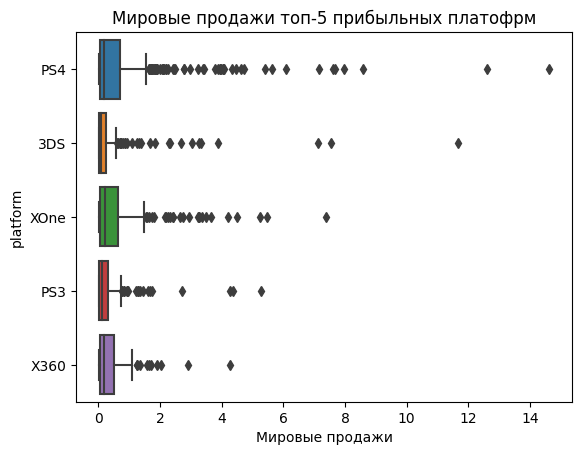

In [27]:
plat_top=["PS4","XOne", "3DS", "PS3", "X360"]
df_platf=df.query('platform==@plat_top')
sns.boxplot(y='platform',x='total_sales', data=df_platf)
plt.xlabel('Мировые продажи')
plt.title('Мировые продажи топ-5 прибыльных платофрм')
plt.suptitle('')

Удалим явные выбросы. 

Text(0.5, 0.98, '')

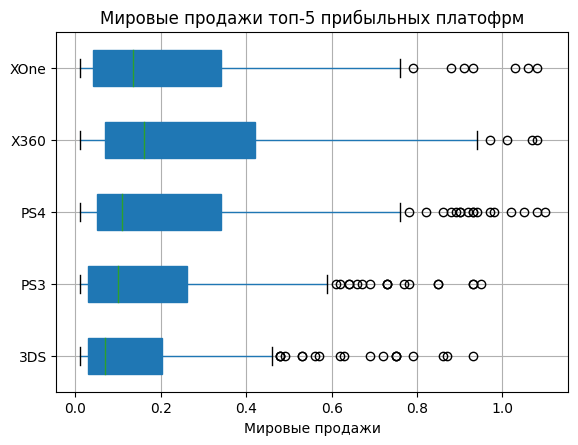

In [28]:
df_platf_сut=df_platf.drop(df_platf[df_platf['total_sales']>1.1].index)
ax=df_platf_сut.boxplot(column='total_sales', by='platform', vert=False, patch_artist=True)
plt.xlabel('Мировые продажи')
plt.title('Мировые продажи топ-5 прибыльных платофрм')
plt.suptitle('')

Максимальные медианные значения у платформ 'XOne', 'X360'. Самая популярная  платформа по продажам -'X360'.

3.9. Построили диаграммы рассеивания зависимости продаж от отзывов пользователей и критиков по платформе 'X360'. Посчитали Коэффициент коррелиции  между отзывами и продажами.


Коэффициент корреляции между отзывами критиков и продажами- 0.53


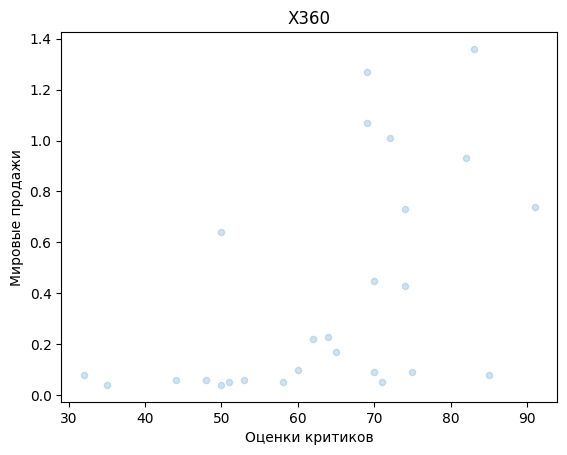

In [29]:
(df_platf.query('platform=="X360"')
         .plot(y='total_sales', x='critic_score', kind='scatter',title='X360', xlabel="Оценки критиков", ylabel='Мировые продажи',alpha=0.2 )
)
x360=df_platf.query('platform=="X360"')
print('Коэффициент корреляции между отзывами критиков и продажами-', x360['critic_score'].corr(x360['total_sales']).round(2))

Коэффициент корреляции между отзывами критиков и продажами- 0.53, говорит нам, что между переменными наблюдается положительная корреляция. Чем выше оценка критиков, тем больше продажи.

Коэффициент корреляции между отзывами пользователей и продажами- -0.14


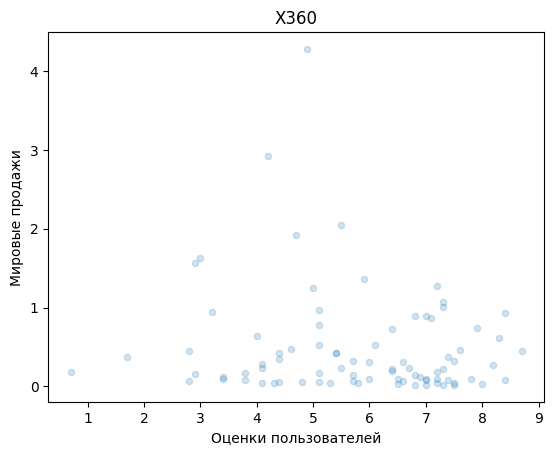

In [30]:
(df_platf.query('platform=="X360"')
         .plot(y='total_sales', x='user_score', kind='scatter', title='X360',xlabel="Оценки пользователей", ylabel='Мировые продажи',alpha=0.2 )
)
print('Коэффициент корреляции между отзывами пользователей и продажами-', x360['user_score'].corr(x360['total_sales']).round(2))

Коэффициент корреляции между отзывами пользователей и продажами- 0.14, также положительным, как вышевычесленный, но менее выражен. Значит оценка критиков имеет большее влияние на количесвто продаж, чем оценка пользователей. 

3.10. Построили  диаграммы рассеивания зависимости продаж от отзывов пользователей и критиков по оставшиемся прибыльным платформам-"PS4","XOne", "3DS", "PS3",. Посчитали коэффициент коррелиции между отзывами и продажами.

Коэффициент корреляции между отзывами критиков и продажами- 0.4
Коэффициент корреляции между отзывами пользователей и продажами- -0.04


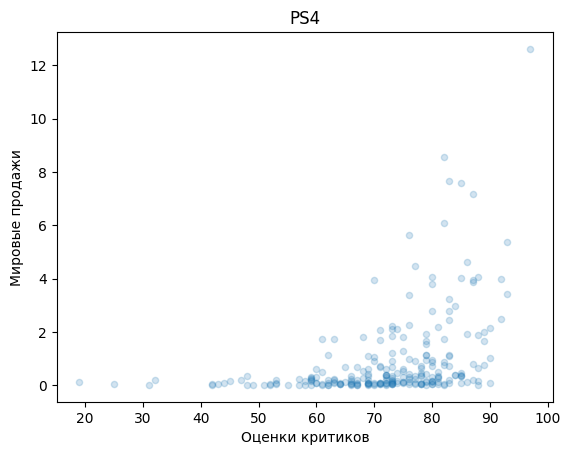

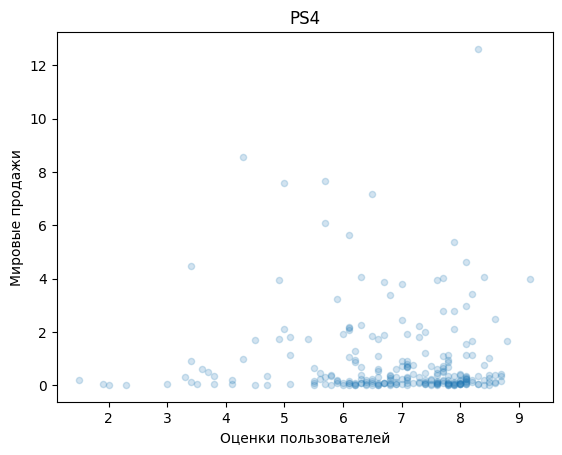

In [31]:
(df_platf.query('platform=="PS4"')
         .plot(y='total_sales', x='critic_score', kind='scatter',title='PS4', xlabel="Оценки критиков", ylabel='Мировые продажи',alpha=0.2 )
)
ps4=df_platf.query('platform=="PS4"')
print('Коэффициент корреляции между отзывами критиков и продажами-', ps4['critic_score'].corr(ps4['total_sales']).round(2))
(df_platf.query('platform=="PS4"')
         .plot(y='total_sales', x='user_score', kind='scatter', title='PS4',xlabel="Оценки пользователей", ylabel='Мировые продажи',alpha=0.2 )
)
print('Коэффициент корреляции между отзывами пользователей и продажами-', ps4['user_score'].corr(ps4['total_sales']).round(2))

Коэффициент корреляции между отзывами критиков и продажами- 0.45
Коэффициент корреляции между отзывами пользователей и продажами- -0.17


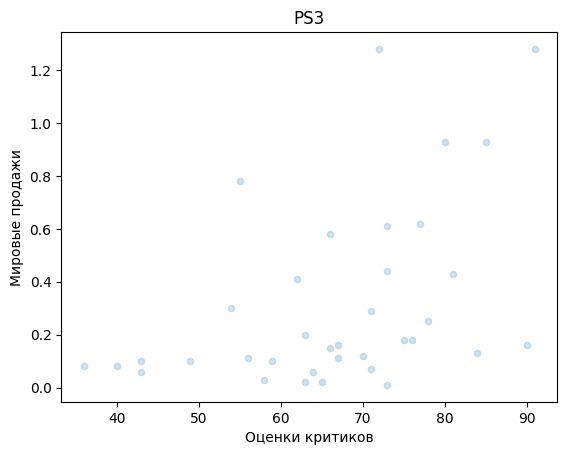

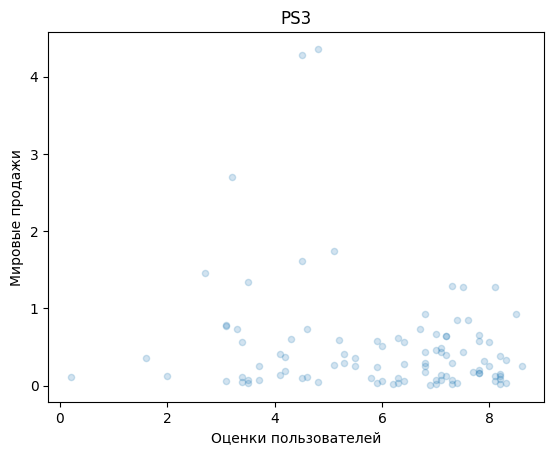

In [32]:
(df_platf.query('platform=="PS3"')
         .plot(y='total_sales', x='critic_score', kind='scatter',title='PS3', xlabel="Оценки критиков", ylabel='Мировые продажи',alpha=0.2 )
)
ps3=df_platf.query('platform=="PS3"')
print('Коэффициент корреляции между отзывами критиков и продажами-', ps3['critic_score'].corr(ps3['total_sales']).round(2))
(df_platf.query('platform=="PS3"')
         .plot(y='total_sales', x='user_score', kind='scatter', title='PS3' ,xlabel="Оценки пользователей", ylabel='Мировые продажи',alpha=0.2 )
)
print('Коэффициент корреляции между отзывами пользователей и продажами-', ps3['user_score'].corr(ps3['total_sales']).round(2))

Коэффициент корреляции между отзывами критиков и продажами- 0.43
Коэффициент корреляции между отзывами пользователей и продажами- -0.07


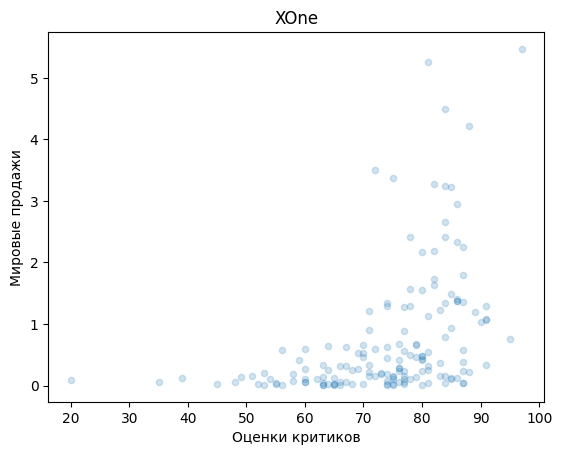

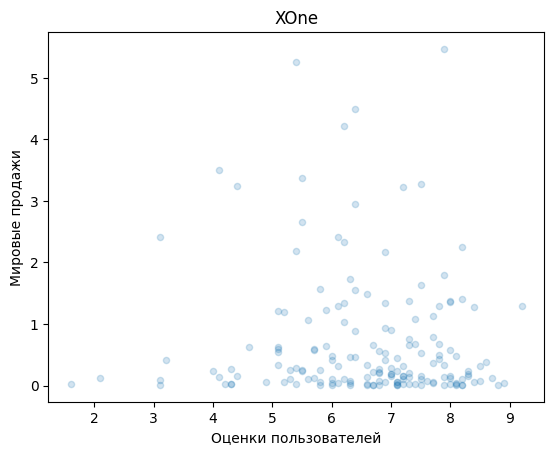

In [33]:
(df_platf.query('platform=="XOne"')
         .plot(y='total_sales', x='critic_score', kind='scatter',title='XOne', xlabel="Оценки критиков", ylabel='Мировые продажи',alpha=0.2 )
)
xone=df_platf.query('platform=="XOne"')
print('Коэффициент корреляции между отзывами критиков и продажами-', xone['critic_score'].corr(xone['total_sales']).round(2))
(df_platf.query('platform=="XOne"')
         .plot(y='total_sales', x='user_score', kind='scatter', title='XOne' ,xlabel="Оценки пользователей", ylabel='Мировые продажи',alpha=0.2 )
)
print('Коэффициент корреляции между отзывами пользователей и продажами-', xone['user_score'].corr(xone['total_sales']).round(2))

Коэффициент корреляции между отзывами критиков и продажами- 0.31
Коэффициент корреляции между отзывами пользователей и продажами- 0.22


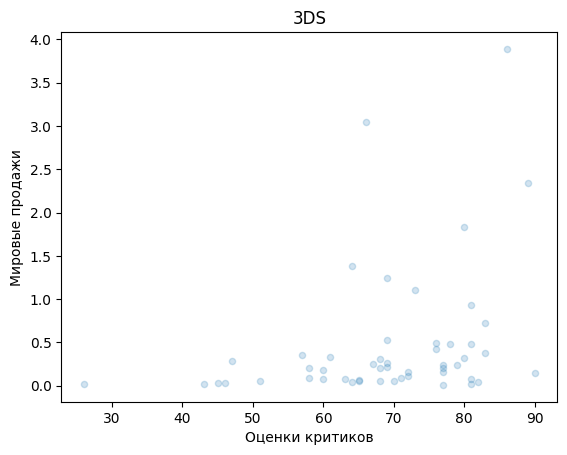

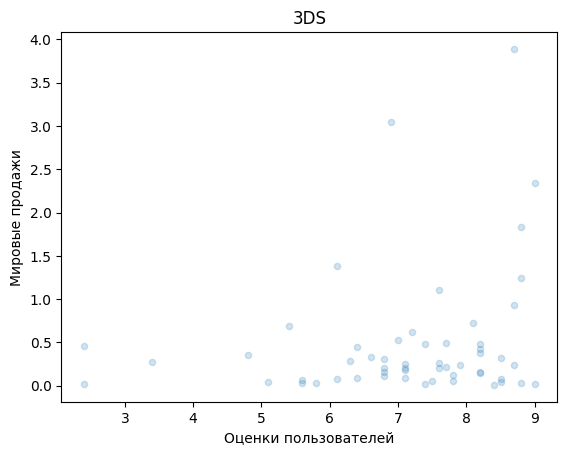

In [34]:
(df_platf.query('platform=="3DS"')
         .plot(y='total_sales', x='critic_score', kind='scatter',title='3DS', xlabel="Оценки критиков", ylabel='Мировые продажи',alpha=0.2 )
)
ds3=df_platf.query('platform=="3DS"')
print('Коэффициент корреляции между отзывами критиков и продажами-', ds3['critic_score'].corr(ds3['total_sales']).round(2))
(df_platf.query('platform=="3DS"')
         .plot(y='total_sales', x='user_score', kind='scatter', title='3DS' ,xlabel="Оценки пользователей", ylabel='Мировые продажи',alpha=0.2 )
)
print('Коэффициент корреляции между отзывами пользователей и продажами-', ds3['user_score'].corr(ds3['total_sales']).round(2))

У платформ "PS4","XOne", "3DS", "PS3" коэффициент корреляции между отзывами критиков и продажами близок к коэффиценту платфоммы 'X360'-0.53, а коэффециет между отзывами пользоватлей и продажами  тоже близок к коэффиценту платфоммы- 0.14  Можно сказать, что на данных платформам оценка критиков также влияет на продажи. 

3.11. Построили гисторгамму распределения игр по жанрам.

<AxesSubplot:title={'center':'Мировые продажи по жанрам'}, xlabel='Жанры', ylabel='Мировые продажи'>

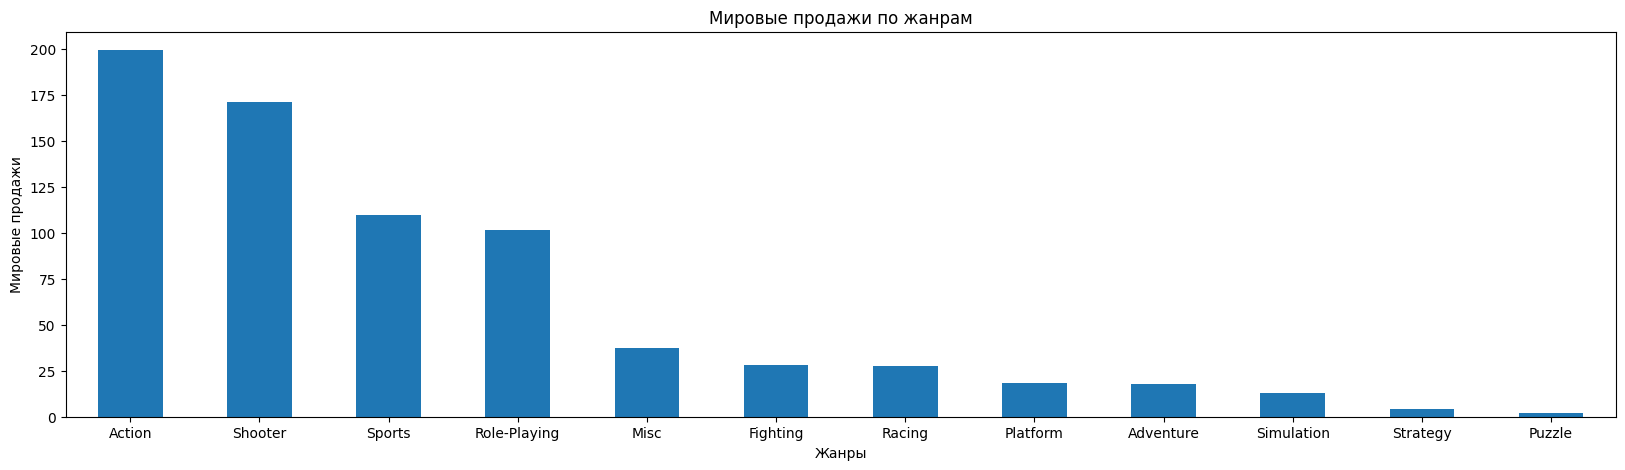

In [35]:
(df.groupby('genre')['total_sales'].sum()
.sort_values(ascending=False)
.plot(x='genre', y='total_sales', kind='bar', figsize=(20,5), ylabel='Мировые продажи', xlabel='Жанры', title='Мировые продажи по жанрам', rot=360)
)

Text(0.5, 0.98, '')

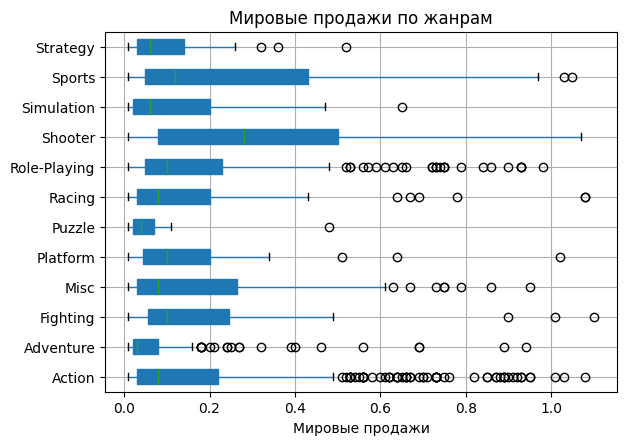

In [52]:
df_сut=df.drop(df[df['total_sales']>1.1].index)
ax=df_сut.boxplot(column='total_sales', by='genre', vert=False, patch_artist=True)
plt.xlabel('Мировые продажи')
plt.title('Мировые продажи по жанрам')
plt.suptitle('')

Максимальное медианное значение у жанра shooter. Также хорошо продается жанр sports.

### Вывод:
<ul>
    <li>Пик выпуска игр приходился на период с 2002-2011.</li>
    <li>Новые платформы появляются в течение 1-3 лет. Такие платформы, как "QQ", "SCD", "DO", "TG16", "PCFX" просуществовали 1-2 года. В среднем платформы исчезают через 6-9 лет, но, например, "DS" ушла с рынка через 28 лет.</li>
    <li>Наиболее прибыльные платформы: "PS4","XOne", "3DS", "PS3", "X360".</li>
    <li>Самая популярная платформа по продажам -"X360".</li>
    <li>Рассмотря зависимость продаж игр от отзывов пользователей и критиков, можно выделить следюущее, что оценка критиков имеет большее влияние на количесвто продаж, чем оценка пользователей.</li> 
    <li>Самыми продаваемыми являются жанры 'shooter' и 'sport'.</li>
</ul>

## Портрет пользователя каждого региона

4.1.Определили для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5).


<AxesSubplot:title={'center':'Топ-5 платформ в Европе:'}, xlabel='Плафтормы', ylabel='Продажи'>

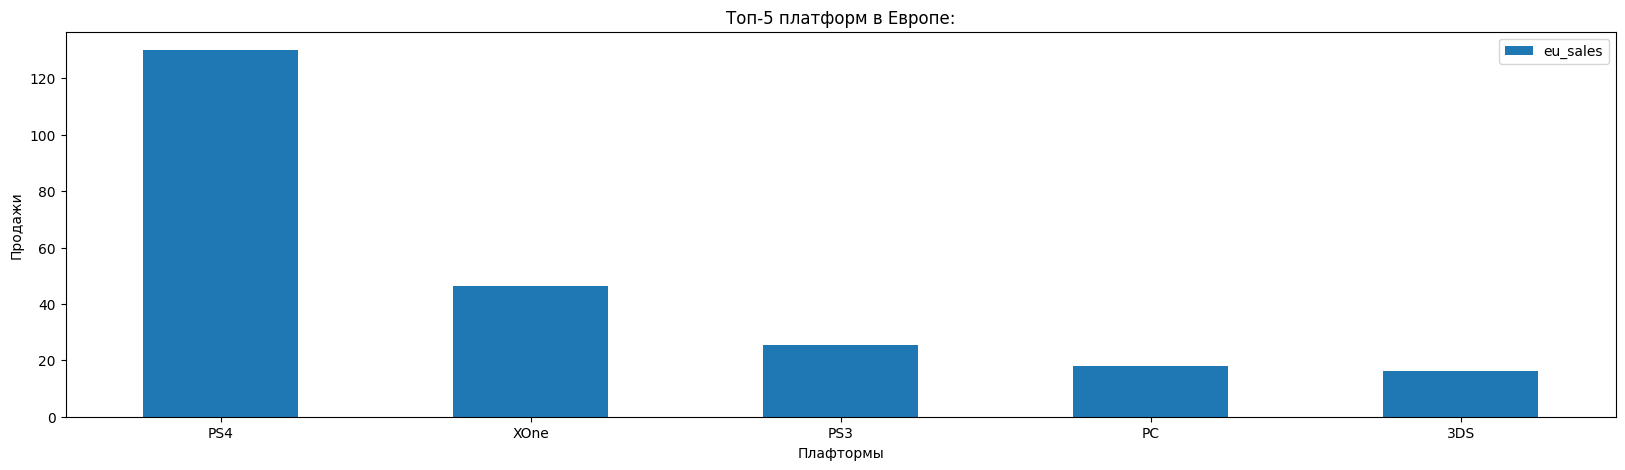

In [37]:
(df.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
.sort_values('eu_sales', ascending=False).head(5)
.plot(kind='bar', figsize=(20,5), rot=360, xlabel='Плафтормы', ylabel='Продажи', title='Топ-5 платформ в Европе:')
)

<AxesSubplot:title={'center':'Топ-5 платформ в Северной Америке:'}, xlabel='Плафтормы', ylabel='Продажи'>

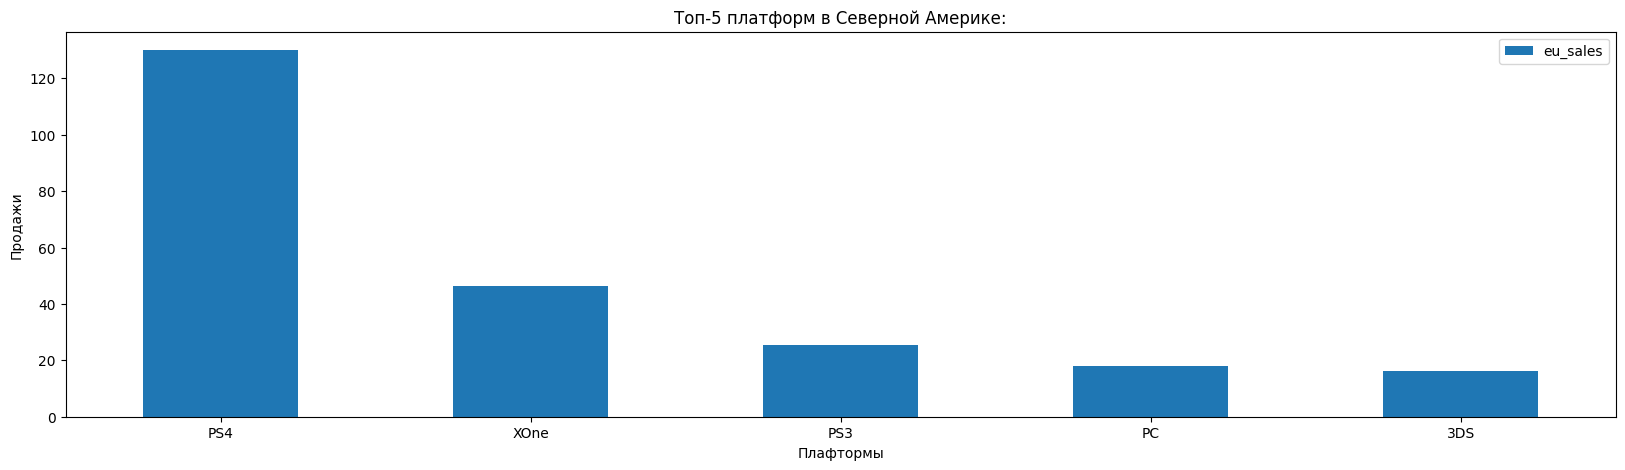

In [38]:
(df.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
.sort_values('eu_sales', ascending=False).head(5)
.plot(kind='bar', figsize=(20,5), rot=360, xlabel='Плафтормы', ylabel='Продажи', title='Топ-5 платформ в Северной Америке:')
)

<AxesSubplot:title={'center':'Топ-5 платформ в Японии:'}, xlabel='Плафтормы', ylabel='Продажи'>

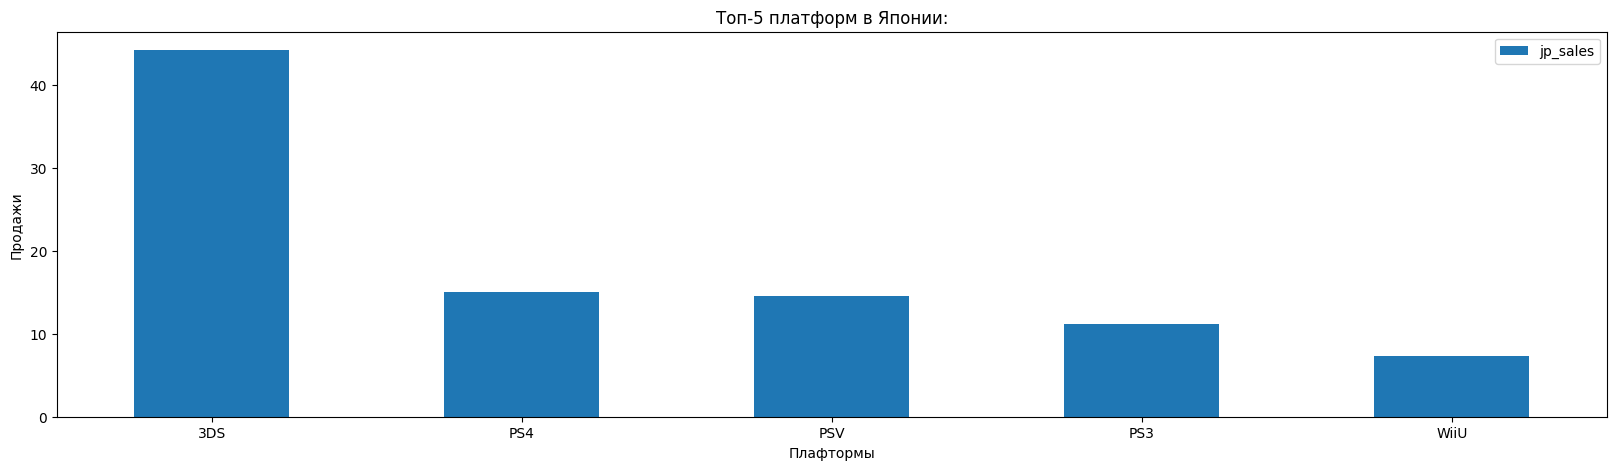

In [39]:
(df.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
.sort_values('jp_sales', ascending=False).head(5)
.plot(kind='bar', figsize=(20,5), rot=360, xlabel='Плафтормы', ylabel='Продажи', title='Топ-5 платформ в Японии:')
)

<ul>
    <li>Топ-5 в Северной Америке:"PS4", "XOne", "X360", "3DS", "PS3":</li>
    <li>Топ-5 в Европе:"PS4", "XOne","PS3", "PC", "3DS"</li>
    <li>Топ-5 в Японии:"3DS", "PS4", "PSV", "PS3", "WiiU"</li>
</ul>
Продажи в Японии значительно ниже, чем В Северной Америки и Европе. Больше всего игр продается в Северной Америки, можно предположить, что это из-за того, что платформы разработались именно там.

4.2. Определили для пользователя каждого региона (NA, EU, JP) cамые популярные жанры (топ-5).

<AxesSubplot:title={'center':'Топ-5 жанров в Северной Америке:'}, xlabel='Плафтормы', ylabel='Продажи'>

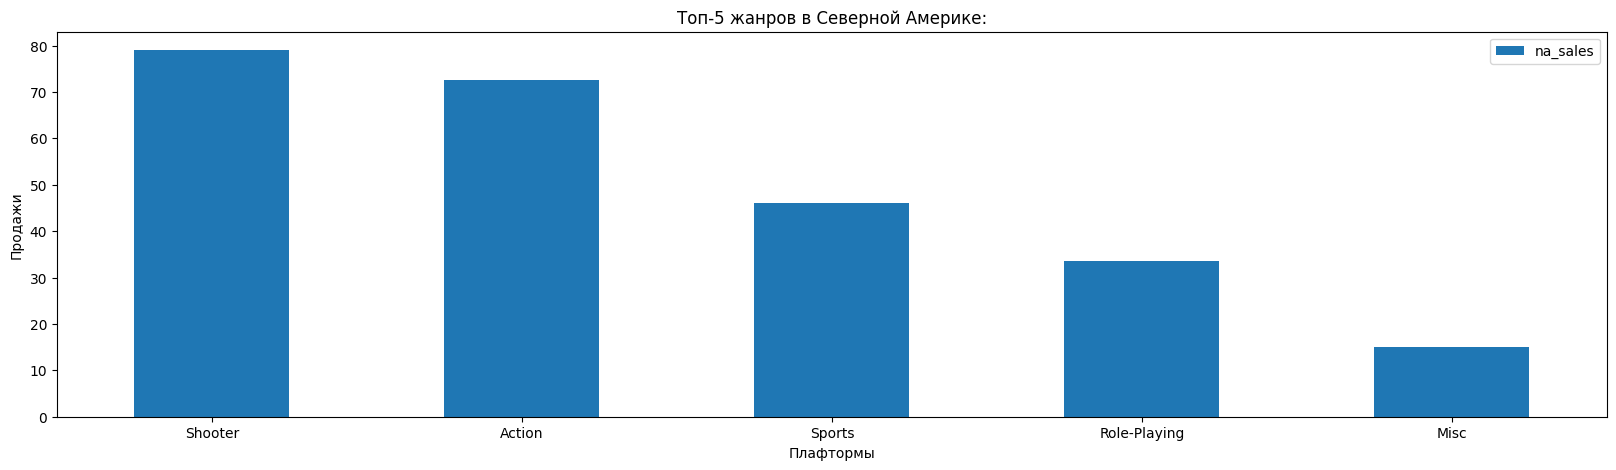

In [40]:
(df.pivot_table(index='genre', values='na_sales', aggfunc='sum')
.sort_values('na_sales', ascending=False).head(5)
.plot(kind='bar', figsize=(20,5), rot=360, xlabel='Плафтормы', ylabel='Продажи', title='Топ-5 жанров в Северной Америке:')
)

<AxesSubplot:title={'center':'Топ-5 жанров в Европе:'}, xlabel='Жанры', ylabel='Продажи'>

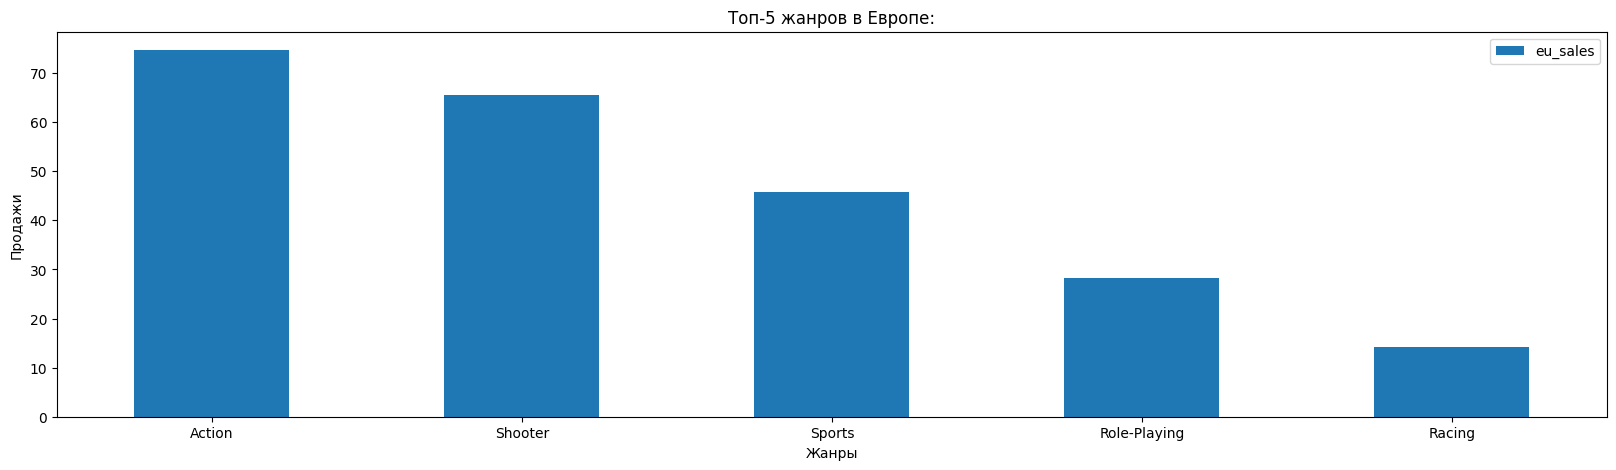

In [41]:
(df.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
.sort_values('eu_sales', ascending=False).head(5)
.plot(kind='bar', figsize=(20,5), rot=360, xlabel='Жанры', ylabel='Продажи', title='Топ-5 жанров в Европе:')
)

<AxesSubplot:title={'center':'Топ-5 жанров в Японии:'}, xlabel='Жанры', ylabel='Продажи'>

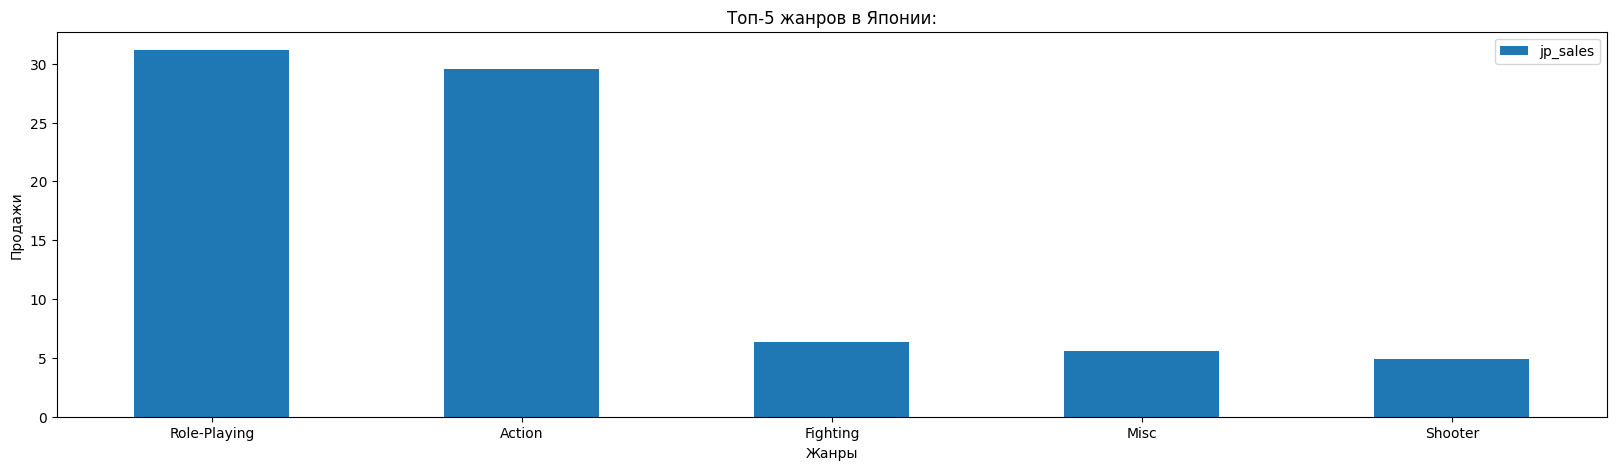

In [42]:
(df.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
.sort_values('jp_sales', ascending=False).head(5)
.plot(kind='bar', figsize=(20,5), rot=360, xlabel='Жанры', ylabel='Продажи', title='Топ-5 жанров в Японии:')
)

<ul>
    <li>Топ-5 в Северной Америке: shooter, action, sports, role-playing, racing</li>
    <li>Топ-5 в Европе:action, shooter, sports, role-playing, racing</li>
    <li>Топ-5 в Японии:role-playing, action, fighting, misc, shooter</li>
    
</ul>

4.3. Определили для пользователя каждого региона (NA, EU, JP) с каким рейтингом ESRB больше всего покупают игры.

<AxesSubplot:title={'center':'В Северной Америке:'}, xlabel=' ESRB', ylabel='Продажи'>

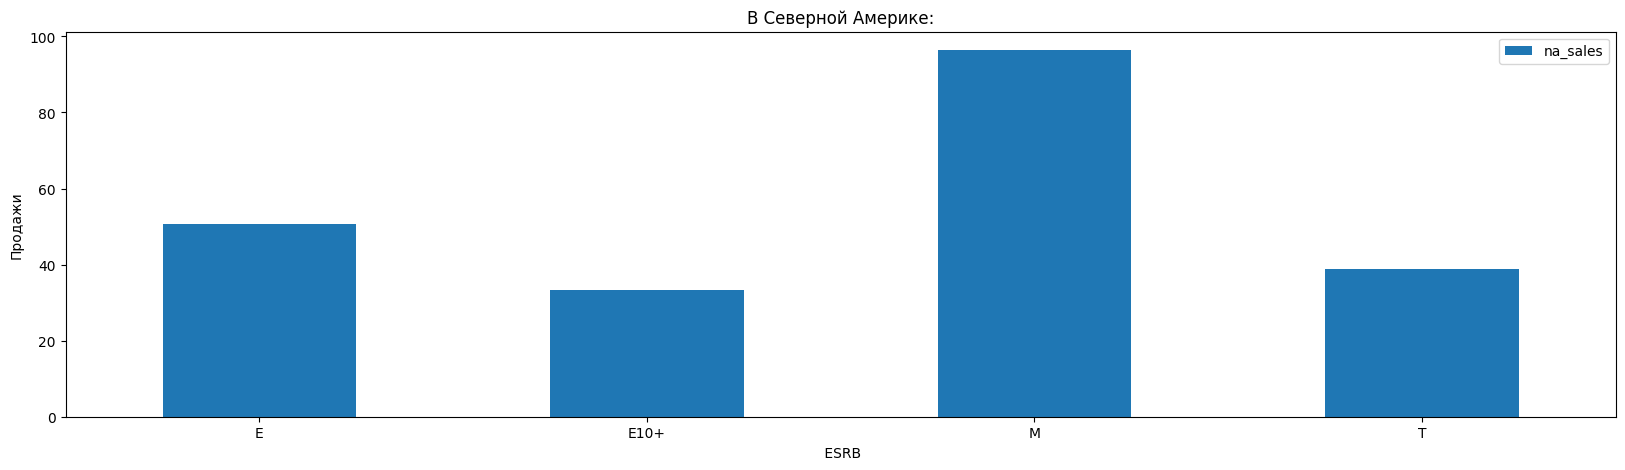

In [43]:
(df.pivot_table(index='rating', values='na_sales', aggfunc='sum')
.plot(kind='bar', figsize=(20,5), rot=360, xlabel=' ESRB', ylabel='Продажи', title='В Северной Америке:')
)

<AxesSubplot:title={'center':'В Европе:'}, xlabel=' ESRB', ylabel='Продажи'>

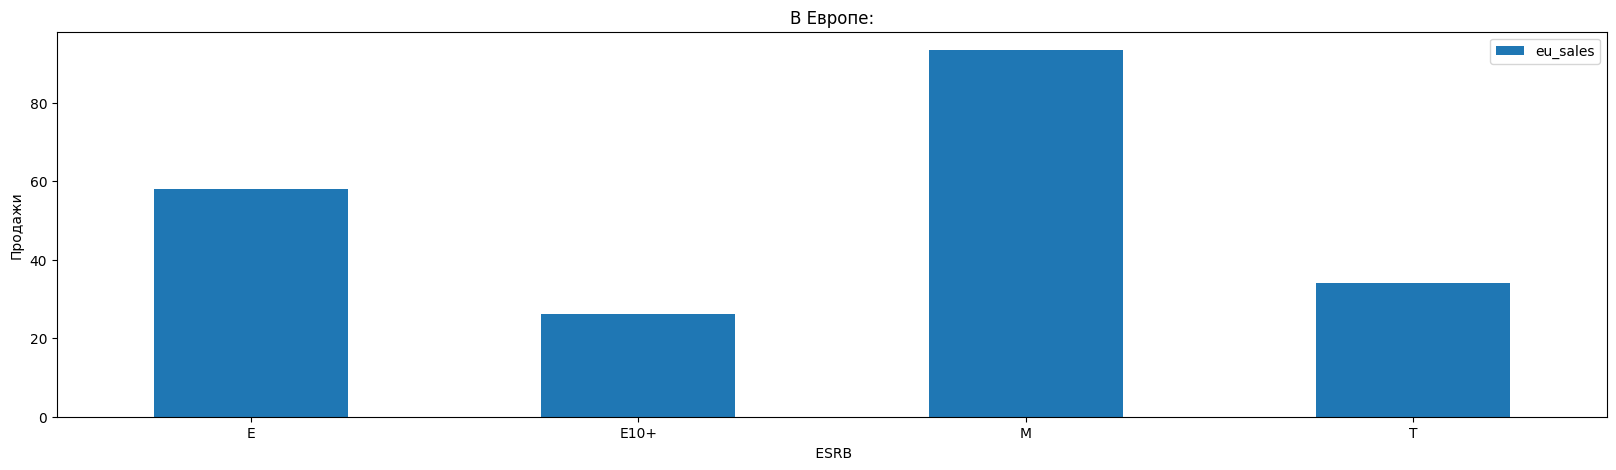

In [44]:
(df.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
.plot(kind='bar', figsize=(20,5), rot=360, xlabel=' ESRB', ylabel='Продажи', title='В Европе:')
)

<AxesSubplot:title={'center':'В Японии:'}, xlabel=' ESRB', ylabel='Продажи'>

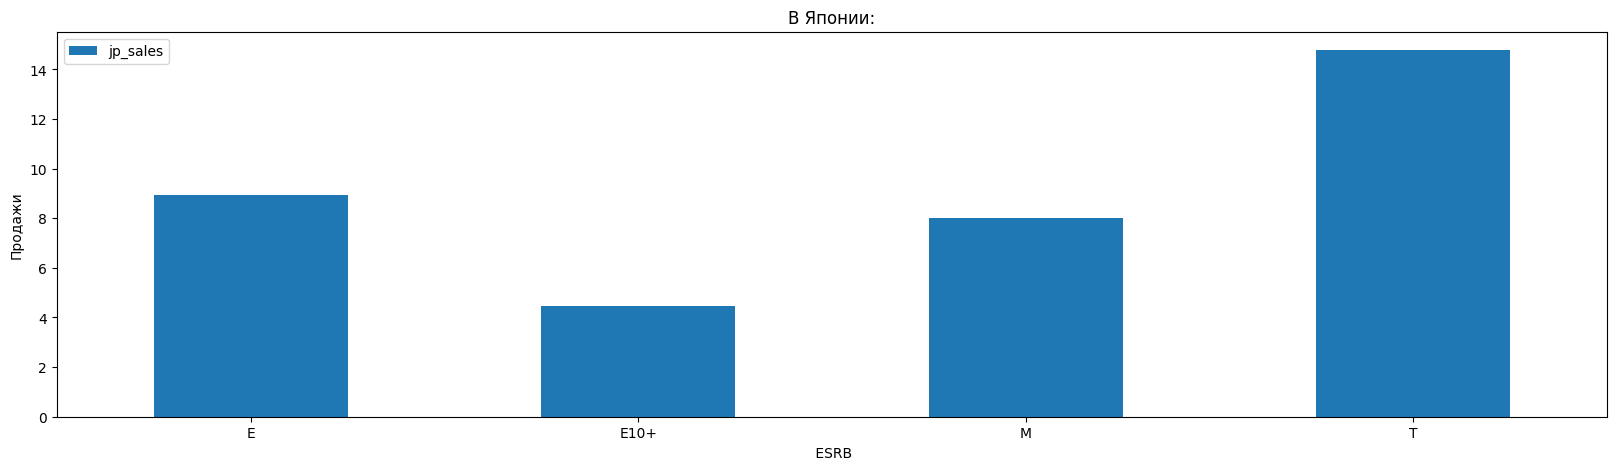

In [45]:
(df.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
.plot(kind='bar', figsize=(20,5), rot=360, xlabel=' ESRB', ylabel='Продажи', title='В Японии:')
)

<ul>
   <li>В Северной Америке больше всего продается игры с рейтингом-«M» («Mature») — «Для взрослых».</li>
   <li>В Европе больше всего продается игры с рейтингом-«M» («Mature») — «Для взрослых».</li>
   <li>В Японии больше всего продается игры с рейтингом-«T» («Teen») — «Подросткам».</li>
</ul>

### Вывод:
<ul>
    <li>Для Северной Америки и Европы топ-5:"PS3", "X360", "DS", "Wii", "PS2". Для Японии:"PS3", "DS", "Wii", "PS2", "PSP".</li>
    <li>Топ-5 жанров в Северной Америке и Европе: action, sports, shooter, misc, racing. Топ-5 в Японии: role-playing, action, misc, sports, platform. </li>
    <li>Больше всего продаж с рейтингом «E» («Everyone») — «Для всех», далее T» («Teen») — «Подросткам», 3 место занимает«M» («Mature») — «Для взрослых»:, за ним «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».</li>
</ul>

## Гипотезы

5.1.Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

```
H_0: Средние пользовательские рейтинги(user_score) платформы Xbox One = cредние пользовательские рейтинги(user_score)    платформы PC
H_1: Средние пользовательские рейтинги(user_score) платформы Xbox One ≠ cредние пользовательские рейтинги(user_score)   платформы PC
alpha = 0.05
```

In [46]:
from scipy import stats as st
xone=df[df['platform']=='XOne']
xone=xone.query('user_score>=0')
pc=df[df['platform']=='PC']
pc=pc.query('user_score>=0')
var_xone=np.var(xone['user_score'])    
var_pc=np.var(pc['user_score']) 
print(var_xone)
print(var_pc)

1.8795460055096425
2.8773743617307175


Дисперссси генеральных совокупностей по Xbox One и PC достаточно отличаются. Поэтому при расчете t-testa надо указать equal_var = False.

In [56]:
results =st.ttest_ind(xone['user_score'],pc['user_score'], equal_var = False)
alpha= 0.05
print('p-значение:', results.pvalue)
if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу ')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668835
Не получилось отвергнуть нулевую гипотезу


Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.

5.2.Проверка гипотезы: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
```
H_0: Средние пользовательские рейтинги(user_score) жанра Action = cредние пользовательские рейтинги(user_score)  жанра  Sports
H_1: Средние пользовательские рейтинги(user_score)  жанра Action ≠  cредние пользовательские рейтинги(user_score)  жанра Sports
alpha = 0.05
```

In [48]:
act=df[df['genre']=='Action']
act=act.query('user_score>=0')
spr=df[df['genre']=='Sports']
spr=spr.query('user_score>=0')
var_act=np.var(act['user_score'])    
var_spr=np.var(spr['user_score']) 
print(var_act)
print(var_spr)

1.89208448117539
3.4198375596751185


Дисперссси генеральных совокупностей по Action и Sports сильно отличаются. Поэтому при расчете t-testa надо указать equal_var = False.

In [55]:
results =st.ttest_ind(act['user_score'],spr['user_score'],equal_var = False)
alpha= 0.05
print('p-значение:', results.pvalue)
if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу ')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу 


Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  

Для того чтобы отвегнуть или не отвегнуть гипотезы, мы сравнивали значание pvalue со значением уровеня стат.значимости. Выбрали значение уровня стат.значимости 0.05, чтобы вероятность ошибки первого рода не превышала 5%. Выбрали для проверки гипотез именно  scipy.stats.ttest_ind (array1, array2, equal_var), так как генеральные совокупности не зависели друг от друга.

### Вывод:
<ul>
    <li>Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.</li>
    <li>Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.</li>
</ul>

## Общий вывод
Завершив исследование данных интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. , можно выделить следyющее:
<ul>
    <li>Наблюдения по всем категориям
        <ol>
            <li>Пик выпуска игр приходился на период с 2002-2011.</li>
            <li>Новые платформы появляются в течение 1-3 лет. Такие платформы, как "QQ", "SCD", "DO", "TG16", "PCFX" просуществовали 1-2 года. В среднем платформы исчезают через 6-9 лет, но, например, "DS" ушла с рынка через 28 лет.</li>
            <li>Наиболее прибыльные платформы: "PS4","XOne", "3DS", "PS3", "X360".</li>
            <li>Самая популярная платформа по продажам -"X360".</li>
            <li>Рассмотря зависимость продаж игр от отзывов пользователей и критиков, можно выделить следюущее, что оценка критиков имеет большее влияние на количесвто продаж, чем оценка пользователей.</li> 
            <li>Самыми продаваемыми являются жанры 'shooter' и 'sport'.</li>    
        </ol>
    </li>  
    <li>Портрет пользователя каждого региона(Северная Америка, Европа, Япония)
        <ol> <li>Топ-5 платформ:
                  <ul><li>Топ-5 в Северной Америке:"PS4", "XOne", "X360", "3DS", "PS3":</li>
                       <li>Топ-5 в Европе:"PS4", "XOne","PS3", "PC", "3DS"</li>
                       <li>Топ-5 в Японии:"3DS", "PS4", "PSV", "PS3", "WiiU"</li></ul>
            </li>
            <li>Топ-5 жанров:
                  <ul> <li>Топ-5 в Северной Америке: shooter, action, sports, role-playing, racing</li>
                       <li>Топ-5 в Европе:action, shooter, sports, role-playing, racing</li>
                       <li>Топ-5 в Японии:role-playing, action, fighting, misc, shooter</li></ul>
            </li> 
            <li>Распределние продаж в зависимости от рейтинга  ESRB: 
                  <ul>
                        <li>В Северной Америке больше всего продается игры с рейтингом-«M» («Mature») — «Для взрослых».</li>
                        <li>В Европе больше всего продается игры с рейтингом-«M» («Mature») — «Для взрослых».</li>
                        <li>В Японии больше всего продается игры с рейтингом-«T» («Teen») — «Подросткам».</li>
                 </ul> 
            </li>
            </li>       
    <li>Проверка гипотез.
        <ol>
              <li>Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.</li>
               <li>Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.</li>
        </ol>
    </li>
</ul>
